# **Predicting PSA 10 Card Value in the Pokémon TCG Market: A Data-Driven Approach to Collectible Investment Strategy**

# I. Data Collection

### 1.1 Collecting Metadata

#### Load "Pokemon TCG All Cards 1999 - 2023" CSV

In [ ]:
import pandas as pd

# Load CSV file
file_path = '/content/pokemon-tcg-data-master-1999-2023.csv'
df = pd.read_csv(file_path)

#### Overview and Missing Values

In [ ]:
# Shape and first rows
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (17172, 29)


,id,set,series,publisher,generation,release_date,artist,name,set_num,types,...,retreatCost,convertedRetreatCost,rarity,flavorText,nationalPokedexNumbers,legalities,resistances,rules,regulationMark,ancientTrait
0,base1-1,Base,Base,WOTC,First,1/9/1999,Ken Sugimori,Alakazam,1,['Psychic'],...,"['Colorless', 'Colorless', 'Colorless']",3.0,Rare Holo,Its brain can outperform a supercomputer. Its ...,[65],{'unlimited': 'Legal'},NaN,NaN,NaN,NaN
1,base1-2,Base,Base,WOTC,First,1/9/1999,Ken Sugimori,Blastoise,2,['Water'],...,"['Colorless', 'Colorless', 'Colorless']",3.0,Rare Holo,A brutal Pokémon with pressurized water jets o...,[9],{'unlimited': 'Legal'},NaN,NaN,NaN,NaN
2,base1-3,Base,Base,WOTC,First,1/9/1999,Ken Sugimori,Chansey,3,['Colorless'],...,['Colorless'],1.0,Rare Holo,A rare and elusive Pokémon that is said to bri...,[113],{'unlimited': 'Legal'},"[{'type': 'Psychic', 'value': '-30'}]",NaN,NaN,NaN
3,base1-4,Base,Base,WOTC,First,1/9/1999,Mitsuhiro Arita,Charizard,4,['Fire'],...,"['Colorless', 'Colorless', 'Colorless']",3.0,Rare Holo,Spits fire that is hot enough to melt boulders...,[6],{'unlimited': 'Legal'},"[{'type': 'Fighting', 'value': '-30'}]",NaN,NaN,NaN
4,base1-5,Base,Base,WOTC,First,1/9/1999,Ken Sugimori,Clefairy,5,['Colorless'],...,['Colorless'],1.0,Rare Holo,Its magical and cute appeal has many admirers....,[35],{'unlimited': 'Legal'},"[{'type': 'Psychic', 'value': '-30'}]",NaN,NaN,NaN


In [ ]:
# Column names and data types
print("\n Column info:")
df.info()


 Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      17172 non-null  object 
 1   set                     17172 non-null  object 
 2   series                  17172 non-null  object 
 3   publisher               17172 non-null  object 
 4   generation              17172 non-null  object 
 5   release_date            17172 non-null  object 
 6   artist                  16951 non-null  object 
 7   name                    17172 non-null  object 
 8   set_num                 17172 non-null  object 
 9   types                   14500 non-null  object 
 10  supertype               17172 non-null  object 
 11  subtypes                16998 non-null  object 
 12  level                   2404 non-null   object 
 13  hp                      14536 non-null  float64
 14  evolvesFrom            

In [ ]:
# Missing values per column
print("\n Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


 Missing values per column:
ancientTrait              17113
level                     14768
abilities                 13744
resistances               12891
regulationMark            12240
rules                     11972
evolvesTo                 11382
evolvesFrom               11007
flavorText                 7449
retreatCost                3494
convertedRetreatCost       3494
weaknesses                 3078
nationalPokedexNumbers     2774
types                      2672
attacks                    2663
hp                         2636
rarity                      295
artist                      221
subtypes                    174
supertype                     0
generation                    0
id                            0
release_date                  0
name                          0
set_num                       0
set                           0
series                        0
publisher                     0
legalities                    0
dtype: int64


#### Unique Attributes Summary

In [ ]:
# Unique values per key column
print("\n Unique sets:", df['set'].nunique())
print(" Unique series:", df['series'].nunique())
print(" Unique Pokémon names:", df['name'].nunique())
print(" Unique rarities:", df['rarity'].nunique())
print(" Unique artists:", df['artist'].nunique())


 Unique sets: 156
 Unique series: 16
 Unique Pokémon names: 3947
 Unique rarities: 32
 Unique artists: 306


In [ ]:
# Key categorical variables
print(" Unique sets:", df['set'].nunique())
print(" Example sets:", df['set'].dropna().unique()[:20])

print("\n Unique rarities:", df['rarity'].nunique())
print(" Example rarities:", df['rarity'].dropna().unique())

print("\n Unique supertypes:", df['supertype'].nunique())
print(" Supertypes:", df['supertype'].dropna().unique())

print("\n Unique subtypes:", df['subtypes'].nunique())
print(" Example subtypes:", df['subtypes'].dropna().unique()[:10])

print("\n Unique types:", df['types'].nunique())
print(" Example types:", df['types'].dropna().unique()[:10])

 Unique sets: 156
 Example sets: ['Base' 'Jungle' 'Wizards Black Star Promos' 'Fossil' 'Base Set 2'
 'Team Rocket' 'Gym Heroes' 'Gym Challenge' 'Neo Genesis' 'Neo Discovery'
 'Southern Islands' 'Neo Revelation' 'Neo Destiny' 'Legendary Collection'
 'Expedition Base Set' 'Best of Game' 'Aquapolis' 'Skyridge'
 'Ruby & Sapphire' 'Sandstorm']

 Unique rarities: 32
 Example rarities: ['Rare Holo' 'Rare' 'Uncommon' 'Common' 'Promo' 'Rare Secret'
 'Rare Shining' 'Rare Holo EX' 'Rare Holo Star' 'Rare Holo LV.X'
 'Rare Prime' 'LEGEND' 'Rare Ultra' 'Rare ACE' 'Rare BREAK' 'Rare Holo GX'
 'Rare Rainbow' 'Rare Prism Star' 'Rare Shiny' 'Rare Shiny GX'
 'Rare Holo V' 'Rare Holo VSTAR' 'Rare Holo VMAX' 'Amazing Rare'
 'Classic Collection' 'Trainer Gallery Rare Holo' 'Radiant Rare'
 'Double Rare' 'Illustration Rare' 'Ultra Rare'
 'Special Illustration Rare' 'Hyper Rare']

 Unique supertypes: 3
 Supertypes: ['Pokémon' 'Trainer' 'Energy']

 Unique subtypes: 113
 Example subtypes: ["['Stage 2']" "['Basic

### 1.2 Filtering and Sampling for Price Modeling

#### Select Key Sets Across Generations

In [ ]:
# Select set list
selected_sets = [
    'Base', 'Jungle', 'Neo Genesis', 'EX Deoxys', 'Majestic Dawn',
    'HS—Unleashed', 'Boundaries Crossed', 'Evolutions',
    'Hidden Fates', 'Cosmic Eclipse', 'Evolving Skies', 'Shining Fates',
    '151', 'Paldean Fates'
]

In [ ]:
# Filter full dataset
df_filtered = df[df['set'].isin(selected_sets)].copy()

# Drop rows missing critical fields for modeling
df_filtered = df_filtered.dropna(subset=['rarity', 'types', 'hp'])

#### Sample 1,000 Cards for Price Annotation

In [ ]:
# Sample 1,000 cards from filtered data
sample_df = df_filtered.sample(n=1000, random_state=42).reset_index(drop=True)

In [ ]:
print("Sampled dataset shape:", sample_df.shape)
sample_df[['name', 'set', 'rarity', 'types', 'release_date', 'supertype']].head()

Sampled dataset shape: (1000, 29)


,name,set,rarity,types,release_date,supertype
0,Onix-GX,Hidden Fates,Rare Holo GX,['Fighting'],8/23/2019,Pokémon
1,Mawile,Cosmic Eclipse,Uncommon,['Metal'],11/1/2019,Pokémon
2,Umbreon,Majestic Dawn,Rare,['Darkness'],5/1/2008,Pokémon
3,Clefable,Hidden Fates,Rare,['Fairy'],8/23/2019,Pokémon
4,Staryu,151,Common,['Water'],9/22/2023,Pokémon


In [ ]:
sample_df.head()

,id,set,series,publisher,generation,release_date,artist,name,set_num,types,...,retreatCost,convertedRetreatCost,rarity,flavorText,nationalPokedexNumbers,legalities,resistances,rules,regulationMark,ancientTrait
0,sm115-36,Hidden Fates,Sun & Moon,TPCI,Seventh,8/23/2019,PLANETA Igarashi,Onix-GX,36,['Fighting'],...,"['Colorless', 'Colorless', 'Colorless', 'Color...",4.0,Rare Holo GX,NaN,[95],"{'unlimited': 'Legal', 'expanded': 'Legal'}",NaN,['Pokémon-GX rule: When your Pokémon-GX is Kno...,NaN,NaN
1,sm12-140,Cosmic Eclipse,Sun & Moon,TPCI,Seventh,11/1/2019,kodama,Mawile,140,['Metal'],...,['Colorless'],1.0,Uncommon,"A cunning and terrifying Pokémon, its cuteness...",[303],"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Psychic', 'value': '-20'}]",NaN,NaN,NaN
2,dp5-32,Majestic Dawn,Diamond & Pearl,TPCI,Fourth,5/1/2008,Masakazu Fukuda,Umbreon,32,['Darkness'],...,['Colorless'],1.0,Rare,The light of the moon changed Eevee's genetic ...,[197],{'unlimited': 'Legal'},"[{'type': 'Psychic', 'value': '-20'}]",NaN,NaN,NaN
3,sm115-40,Hidden Fates,Sun & Moon,TPCI,Seventh,8/23/2019,sui,Clefable,40,['Fairy'],...,"['Colorless', 'Colorless']",2.0,Rare,It can't help but hear a pin drop from over ha...,[36],"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Darkness', 'value': '-20'}]",NaN,NaN,NaN
4,sv3pt5-120,151,Scarlet & Violet,TPCI,Ninth,9/22/2023,Arai Kiriko,Staryu,120,['Water'],...,['Colorless'],1.0,Common,"Fish Pokémon nibble at it, but Staryu isn't bo...",[120],"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",NaN,NaN,G,NaN


#### Ensure Unique Cards (Name + Set)

In [ ]:
# Check number of unique cards to search
unique_cards = sample_df[['name', 'set']].drop_duplicates()
print(f"Unique name + set combinations: {unique_cards.shape[0]}")
unique_cards.head()

Unique name + set combinations: 866


,name,set
0,Onix-GX,Hidden Fates
1,Mawile,Cosmic Eclipse
2,Umbreon,Majestic Dawn
3,Clefable,Hidden Fates
4,Staryu,151


#### Generate Google Search Links for PriceCharting

In [ ]:
# Create a DataFrame with unique combinations of card name and set
# This avoids duplicate search results for the same card-set pair
unique_cards = sample_df[['name', 'set']].drop_duplicates().copy()

# Generate Google search URLs to find the card on pricecharting.com
unique_cards['google_search_url'] = unique_cards.apply(
    lambda row: f"https://www.google.com/search?q={row['name']} {row['set']} site:pricecharting.com", axis=1
)

# Export the search links to a CSV file
unique_cards.to_csv('/content/pricecharting_search_links.csv', index=False)

# Preview
unique_cards.head()

,name,set,google_search_url
0,Onix-GX,Hidden Fates,https://www.google.com/search?q=Onix-GX Hidden...
1,Mawile,Cosmic Eclipse,https://www.google.com/search?q=Mawile Cosmic ...
2,Umbreon,Majestic Dawn,https://www.google.com/search?q=Umbreon Majest...
3,Clefable,Hidden Fates,https://www.google.com/search?q=Clefable Hidde...
4,Staryu,151,https://www.google.com/search?q=Staryu 151 sit...


In [ ]:
from google.colab import files
files.download('/content/pricecharting_search_links.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1.3 Price Data Enrichment

### Manual Price Collection

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving card_prices.csv to card_prices (2).csv


In [ ]:
# Load the price dataset
price_df = pd.read_csv('/content/card_prices.csv')

# Preview the structure
print("Shape:", price_df.shape)
price_df.head()

Shape: (866, 7)


,name,set,google_search_url,Ungraded,Grade_9,Grade_10,final_url
0,Onix-GX,Hidden Fates,https://www.google.com/search?q=Onix-GX Hidden...,2.10,14.41,30.00,https://www.pricecharting.com/game/pokemon-hid...
1,Mawile,Cosmic Eclipse,https://www.google.com/search?q=Mawile Cosmic ...,1.30,13.07,35.23,https://www.pricecharting.com/game/pokemon-cos...
2,Umbreon,Majestic Dawn,https://www.google.com/search?q=Umbreon Majest...,10.99,89.99,489.62,https://www.pricecharting.com/game/pokemon-maj...
3,Clefable,Hidden Fates,https://www.google.com/search?q=Clefable Hidde...,1.45,11.00,13.00,https://www.pricecharting.com/game/pokemon-hid...
4,Staryu,151,https://www.google.com/search?q=Staryu 151 sit...,0.99,4.99,34.18,https://www.pricecharting.com/game/pokemon-sca...


In [ ]:
# Rename price columns for consistency
price_df = price_df.rename(columns={
    'Ungraded': 'loose',
    'Grade_9': 'psa_9',
    'Grade_10': 'psa_10'
})

# Drop URL columns
price_df = price_df[['name', 'set', 'loose', 'psa_9', 'psa_10']]

# Preview
price_df.head()

,name,set,loose,psa_9,psa_10
0,Onix-GX,Hidden Fates,2.10,14.41,30.00
1,Mawile,Cosmic Eclipse,1.30,13.07,35.23
2,Umbreon,Majestic Dawn,10.99,89.99,489.62
3,Clefable,Hidden Fates,1.45,11.00,13.00
4,Staryu,151,0.99,4.99,34.18


### Merge Sample with Price Data

In [ ]:
# Merge metadata with price data
merged_df = pd.merge(sample_df, price_df, on=['name', 'set'], how='inner')

# Result
print("Merged shape:", merged_df.shape)
merged_df[['name', 'set', 'rarity', 'types', 'release_date', 'loose', 'psa_9', 'psa_10']].head()

Merged shape: (994, 32)


,name,set,rarity,types,release_date,loose,psa_9,psa_10
0,Onix-GX,Hidden Fates,Rare Holo GX,['Fighting'],8/23/2019,2.10,14.41,30.00
1,Mawile,Cosmic Eclipse,Uncommon,['Metal'],11/1/2019,1.30,13.07,35.23
2,Umbreon,Majestic Dawn,Rare,['Darkness'],5/1/2008,10.99,89.99,489.62
3,Clefable,Hidden Fates,Rare,['Fairy'],8/23/2019,1.45,11.00,13.00
4,Staryu,151,Common,['Water'],9/22/2023,0.99,4.99,34.18


In [ ]:
# Column names and data types
print("\n Column info:")
merged_df.info()

# Data Structure
print("\n Data description:")
merged_df.describe()


 Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      994 non-null    object 
 1   set                     994 non-null    object 
 2   series                  994 non-null    object 
 3   publisher               994 non-null    object 
 4   generation              994 non-null    object 
 5   release_date            994 non-null    object 
 6   artist                  994 non-null    object 
 7   name                    994 non-null    object 
 8   set_num                 994 non-null    object 
 9   types                   994 non-null    object 
 10  supertype               994 non-null    object 
 11  subtypes                994 non-null    object 
 12  level                   289 non-null    object 
 13  hp                      994 non-null    float64
 14  evolvesFrom             431

,hp,convertedRetreatCost,loose,psa_9,psa_10
count,994.000000,916.000000,994.000000,874.00000,853.000000
mean,112.605634,1.783843,23.082082,51.09659,236.496495
std,70.550643,0.876656,104.992003,158.04751,1239.645855
min,30.000000,1.000000,0.310000,0.99000,5.500000
25%,60.000000,1.000000,1.330000,12.00000,34.780000
50%,90.000000,2.000000,1.930000,16.52000,48.390000
75%,130.000000,2.000000,5.990000,29.94000,122.220000
max,340.000000,4.000000,1935.230000,3250.00000,32100.000000


# II. Data Preparation & Cleaning

### 2.1 Cleaning Metadata

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      17172 non-null  object 
 1   set                     17172 non-null  object 
 2   series                  17172 non-null  object 
 3   publisher               17172 non-null  object 
 4   generation              17172 non-null  object 
 5   release_date            17172 non-null  object 
 6   artist                  16951 non-null  object 
 7   name                    17172 non-null  object 
 8   set_num                 17172 non-null  object 
 9   types                   14500 non-null  object 
 10  supertype               17172 non-null  object 
 11  subtypes                16998 non-null  object 
 12  level                   2404 non-null   object 
 13  hp                      14536 non-null  float64
 14  evolvesFrom             6165 non-null 

#### Feature Selection and Column Reduction

In [ ]:
keep_cols = [
    'name', 'set', 'series', 'generation', 'release_date',
    'artist', 'types', 'supertype', 'hp', 'convertedRetreatCost',
    'rarity'
]

In [ ]:
# Cleaned version of the full metadata dataset
df_metadata = df[keep_cols].copy()

#### Format Conversion and Type Cleaning

In [ ]:
# Convert release_date to datetime format
df_metadata['release_date'] = pd.to_datetime(df_metadata['release_date'], errors='coerce')

# Extract release year as a new column
df_metadata['release_year'] = df_metadata['release_date'].dt.year

# Preview
df_metadata[['release_date', 'release_year']].head()

,release_date,release_year
0,1999-01-09,1999
1,1999-01-09,1999
2,1999-01-09,1999
3,1999-01-09,1999
4,1999-01-09,1999


In [ ]:
import ast

# Convert string of list into actual list
df_metadata['types'] = df_metadata['types'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Preview
df_metadata[['types']].head()

,types
0,[Psychic]
1,[Water]
2,[Colorless]
3,[Fire]
4,[Colorless]


In [ ]:
# Check for missing values
missing = df_metadata.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

Missing values per column:
 convertedRetreatCost    3494
hp                      2636
rarity                   295
artist                   221
generation                 0
series                     0
set                        0
name                       0
supertype                  0
types                      0
release_date               0
release_year               0
dtype: int64


### 2.2 Cleaning Price-Enriched Dataset

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      994 non-null    object 
 1   set                     994 non-null    object 
 2   series                  994 non-null    object 
 3   publisher               994 non-null    object 
 4   generation              994 non-null    object 
 5   release_date            994 non-null    object 
 6   artist                  994 non-null    object 
 7   name                    994 non-null    object 
 8   set_num                 994 non-null    object 
 9   types                   994 non-null    object 
 10  supertype               994 non-null    object 
 11  subtypes                994 non-null    object 
 12  level                   289 non-null    object 
 13  hp                      994 non-null    float64
 14  evolvesFrom             431 non-null    ob

#### Feature Selection

In [ ]:
# Columns to drop from the merged dataset
drop_cols = [
    'id', 'publisher', 'set_num', 'level', 'evolvesFrom', 'evolvesTo',
    'abilities', 'attacks', 'retreatCost', 'resistances', 'rules',
    'regulationMark', 'ancientTrait', 'flavorText', 'nationalPokedexNumbers', 'legalities'
]

# Cleaned version
df_prices = merged_df.drop(columns=drop_cols).copy()

#### Transform Dates and Numeric Fields

In [ ]:
# Convert release_date to datetime and extract year
df_prices['release_date'] = pd.to_datetime(df_prices['release_date'], errors='coerce')
df_prices['release_year'] = df_prices['release_date'].dt.year

In [ ]:
# Convert "types" column to list
df_prices['types'] = df_prices['types'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

In [ ]:
print("Cleaned shape:", df_prices.shape)
df_prices.head()

Cleaned shape: (994, 17)


,set,series,generation,release_date,artist,name,types,supertype,subtypes,hp,weaknesses,convertedRetreatCost,rarity,loose,psa_9,psa_10,release_year
0,Hidden Fates,Sun & Moon,Seventh,2019-08-23,PLANETA Igarashi,Onix-GX,[Fighting],Pokémon,"['Basic', 'GX']",200.0,"[{'type': 'Grass', 'value': '×2'}]",4.0,Rare Holo GX,2.10,14.41,30.00,2019
1,Cosmic Eclipse,Sun & Moon,Seventh,2019-11-01,kodama,Mawile,[Metal],Pokémon,['Basic'],70.0,"[{'type': 'Fire', 'value': '×2'}]",1.0,Uncommon,1.30,13.07,35.23,2019
2,Majestic Dawn,Diamond & Pearl,Fourth,2008-05-01,Masakazu Fukuda,Umbreon,[Darkness],Pokémon,['Stage 1'],80.0,"[{'type': 'Fighting', 'value': '+20'}]",1.0,Rare,10.99,89.99,489.62,2008
3,Hidden Fates,Sun & Moon,Seventh,2019-08-23,sui,Clefable,[Fairy],Pokémon,['Stage 1'],120.0,"[{'type': 'Metal', 'value': '×2'}]",2.0,Rare,1.45,11.00,13.00,2019
4,151,Scarlet & Violet,Ninth,2023-09-22,Arai Kiriko,Staryu,[Water],Pokémon,['Basic'],60.0,"[{'type': 'Lightning', 'value': '×2'}]",1.0,Common,0.99,4.99,34.18,2023


In [ ]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   set                   994 non-null    object        
 1   series                994 non-null    object        
 2   generation            994 non-null    object        
 3   release_date          994 non-null    datetime64[ns]
 4   artist                994 non-null    object        
 5   name                  994 non-null    object        
 6   types                 994 non-null    object        
 7   supertype             994 non-null    object        
 8   subtypes              994 non-null    object        
 9   hp                    994 non-null    float64       
 10  weaknesses            947 non-null    object        
 11  convertedRetreatCost  916 non-null    float64       
 12  rarity                994 non-null    object        
 13  loose               

Distribution of Cards by Set (in df_prices)

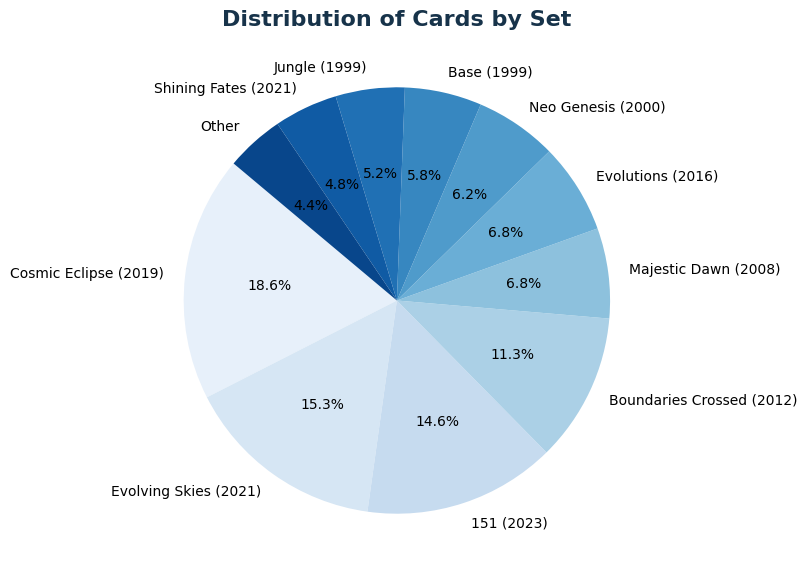

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a label
df_prices['set_label'] = df_prices['set'] + ' (' + df_prices['release_year'].astype(str) + ')'

# Count cards per labeled set
set_counts = df_prices['set_label'].value_counts()

# Top 10 sets only for readability
top_sets = set_counts.head(10)
other_count = set_counts[10:].sum()
top_sets['Other'] = other_count

# Plot
plt.figure(figsize=(8,8))
plt.pie(top_sets.values, labels=top_sets.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(top_sets))) # autopct shows percentages with 1 decimal | # startangle rotates the start angle for better layout
plt.title('Distribution of Cards by Set', fontsize=16, color=title_color, weight='bold')
plt.tight_layout()
plt.show()

# III. Exploratory Data Analysis (EDA)

## 3.1 Market & Metadata Insights

### EDA 3.1.1 - Most Printed Pokémon Across All Sets

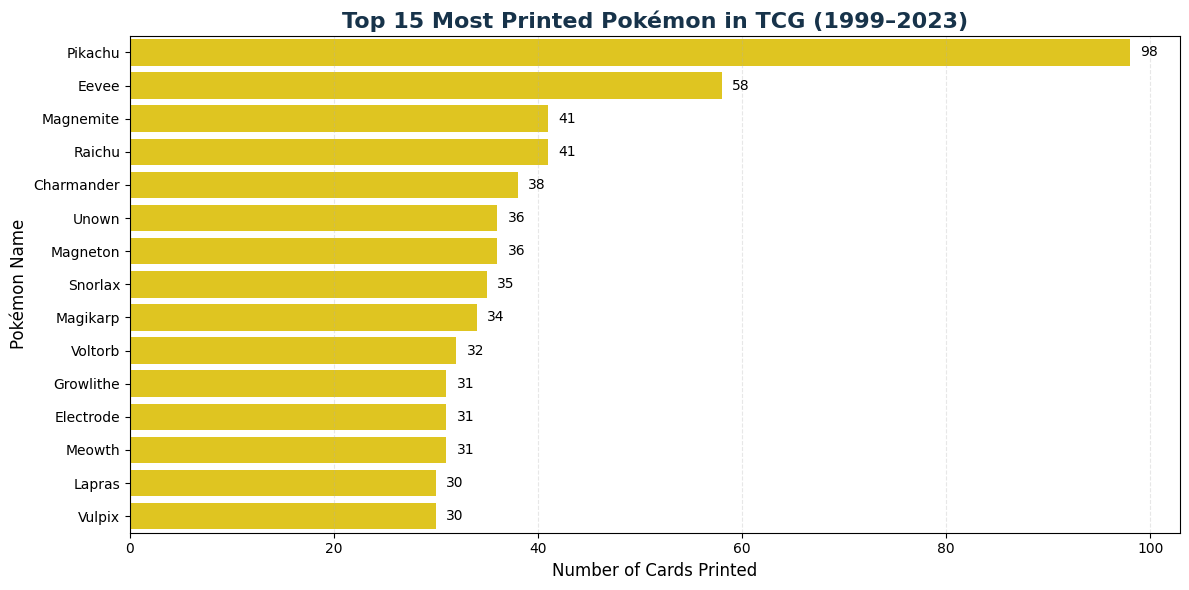

In [ ]:
# Pokémon theme colors
bar_color = '#FFDC01'     # yellow
title_color = '#17334A'   # blue

# Count top 15 Pokémon by number of prints
top_pokemon = df_metadata['name'].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_pokemon.values, y=top_pokemon.index, color=bar_color)

# Value labels at the end of each bar
for i, value in enumerate(top_pokemon.values):
    plt.text(value + 1, i, str(value), va='center', fontsize=10)

# Title and labels
plt.title('Top 15 Most Printed Pokémon in TCG (1999–2023)', fontsize=16, weight='bold', color=title_color)
plt.xlabel('Number of Cards Printed', fontsize=12)
plt.ylabel('Pokémon Name', fontsize=12)

# Gridlines
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### EDA 3.1.2 - Number of Cards Released Per Set

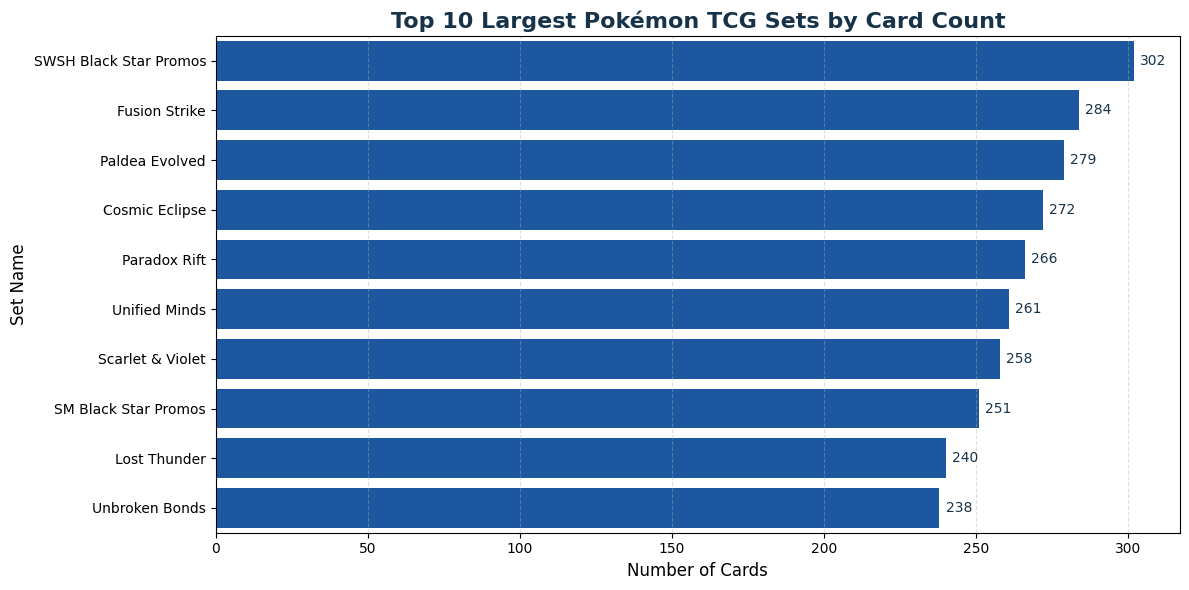

In [ ]:
# Count top 10 sets by number of cards
top_sets = df_metadata['set'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_sets.values, y=top_sets.index, color="#0754b6")

# Title and labels
plt.title('Top 10 Largest Pokémon TCG Sets by Card Count', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Number of Cards', fontsize=12)
plt.ylabel('Set Name', fontsize=12)

# Value labels at end of bars
for i, value in enumerate(top_sets.values):
    plt.text(value + 2, i, str(value), va='center', fontsize=10, color=title_color)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### EDA 3.1.3 - Top Artists in the Pokémon TCG

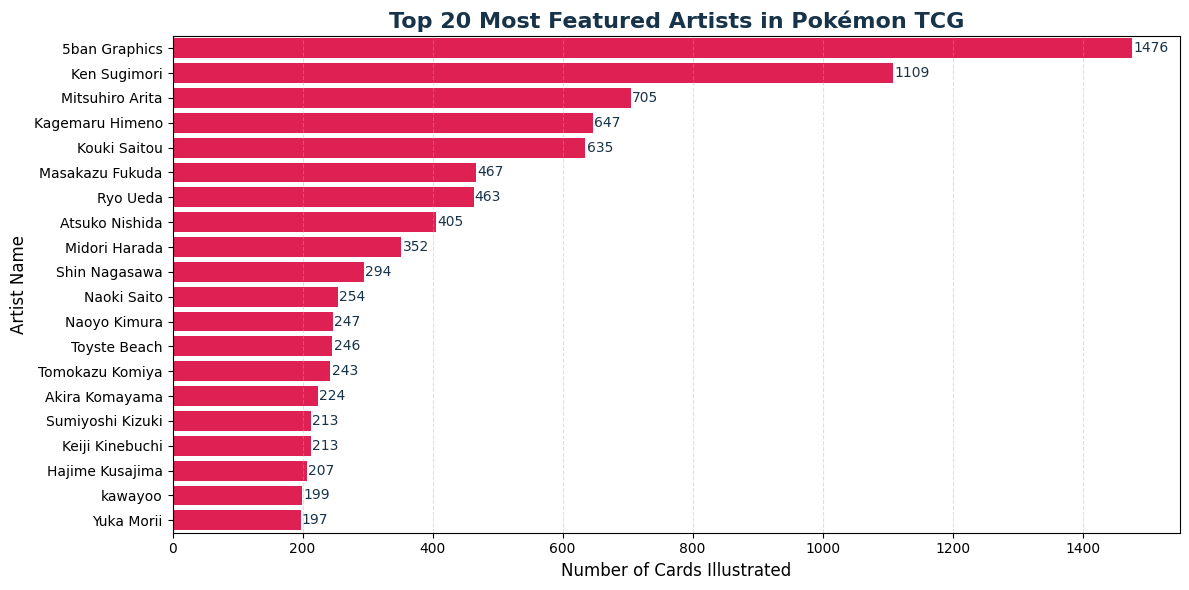

In [ ]:
# Count most frequent artists
top_artists = df_metadata['artist'].value_counts().head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_artists.values, y=top_artists.index, color="#ff0044")

# Title and labels
plt.title('Top 20 Most Featured Artists in Pokémon TCG', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Number of Cards Illustrated', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)

# Labels at end of bars
for i, value in enumerate(top_artists.values):
    plt.text(value + 2, i, str(value), va='center', fontsize=10, color=title_color)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### EDA 3.1.4 - Cards Released Per Year

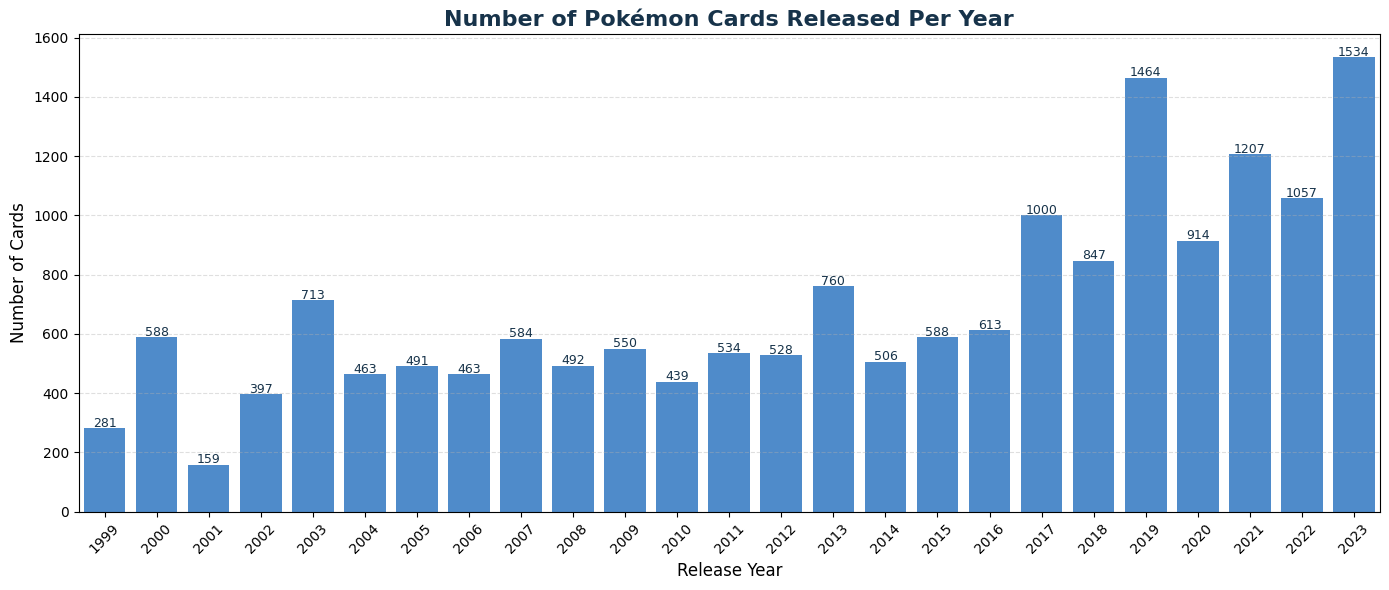

In [ ]:
# Count number of cards by release year
cards_per_year = df_metadata['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=cards_per_year.index, y=cards_per_year.values, color="#3a8ade")

# Title and labels
plt.title('Number of Pokémon Cards Released Per Year', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)

# Value labels above bars
for i, value in enumerate(cards_per_year.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=9, color=title_color)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

 ### EDA 3.1.5 - Rarity Distribution in the TCG

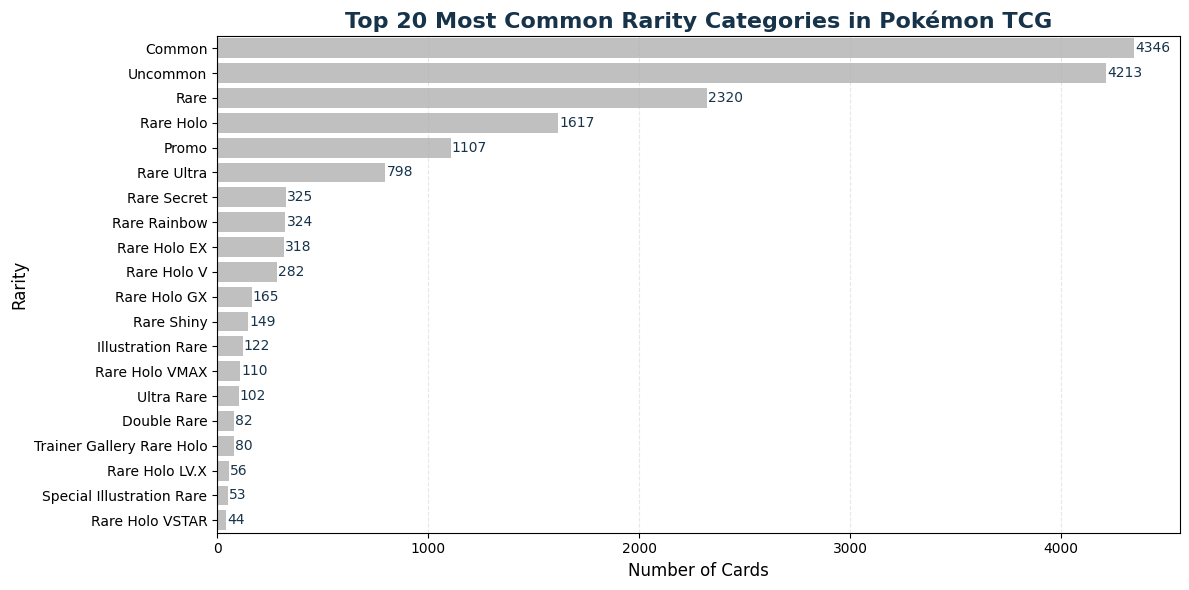

In [ ]:
# Count most common rarities
rarity_counts = df_metadata['rarity'].value_counts().head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=rarity_counts.values, y=rarity_counts.index, color="Silver")

# Title and labels
plt.title('Top 20 Most Common Rarity Categories in Pokémon TCG', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Number of Cards', fontsize=12)
plt.ylabel('Rarity', fontsize=12)

# Value labels at end of bars
for i, value in enumerate(rarity_counts.values):
    plt.text(value + 5, i, str(value), va='center', fontsize=10, color=title_color)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 3.2 Price & Investment Analysis

### EDA 3.2.1 - Grading Impact on Price (PSA 10 vs Ungraded)

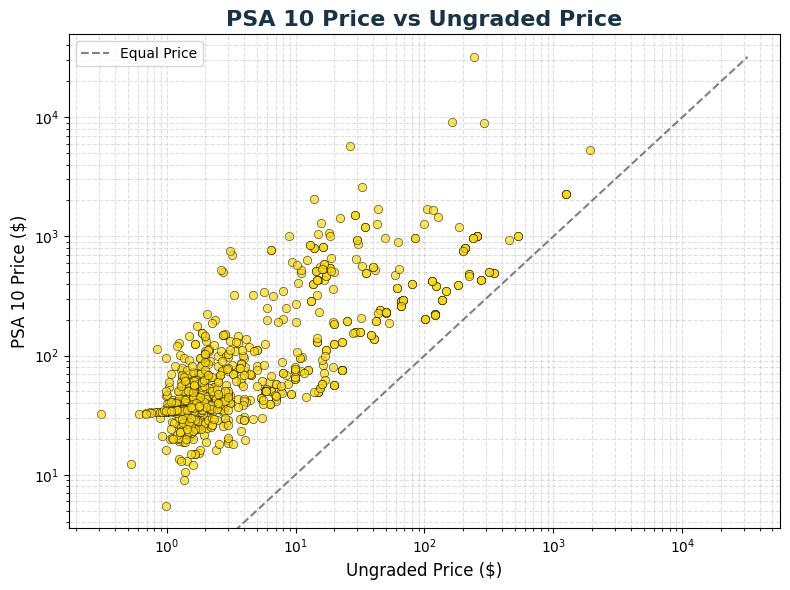

In [ ]:
# Filter for cards with both prices
grade_df = df_prices[df_prices['psa_10'].notnull() & df_prices['loose'].notnull()]

# Scatter plot with log scale
plt.figure(figsize=(8,6))
sns.scatterplot(data=grade_df, x='loose', y='psa_10', color=bar_color, alpha=0.7, edgecolor='k')

# 1:1 reference line
max_val = max(grade_df['loose'].max(), grade_df['psa_10'].max()) # Max value from both price columns
plt.plot([0, max_val], [0, max_val], linestyle='--', color='gray', label='Equal Price')

# Titles and formatting
plt.title('PSA 10 Price vs Ungraded Price', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Ungraded Price ($)', fontsize=12)
plt.ylabel('PSA 10 Price ($)', fontsize=12)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### EDA 3.2.2 - ROI of PSA Grading

<ipython-input-41-575f38dfaeb8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=roi_df, x='rarity', y='psa10_roi', palette=["Silver"]*8)


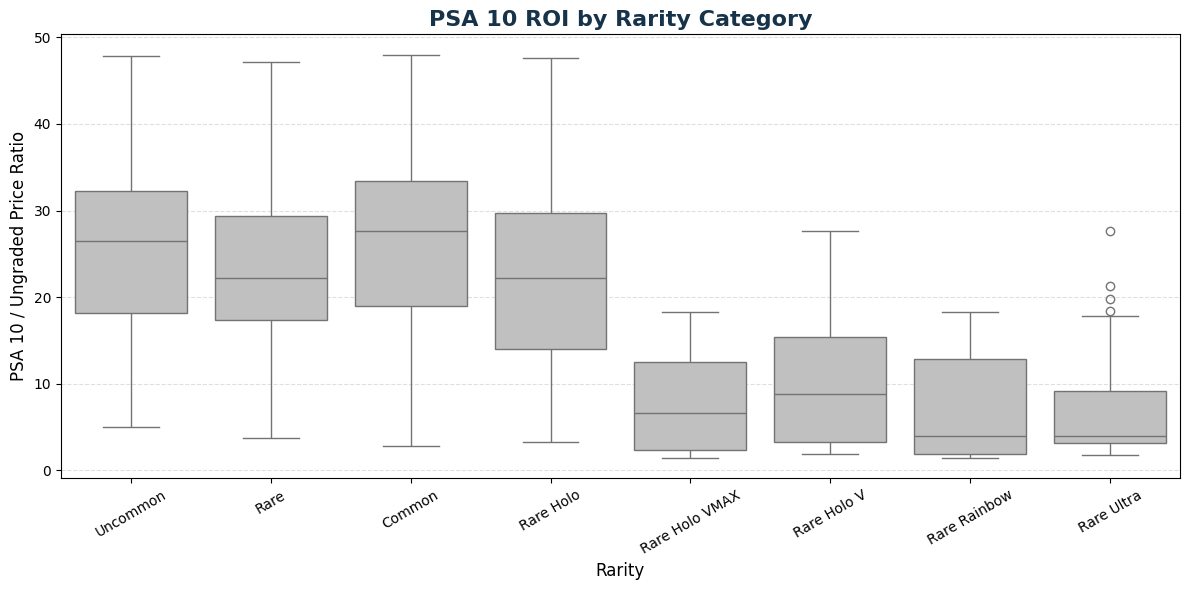

In [ ]:
# ROI column
df_prices['psa10_roi'] = df_prices['psa_10'] / df_prices['loose']

# Filter to valid ROI rows
roi_df = df_prices[(df_prices['psa10_roi'].notnull()) & (df_prices['psa10_roi'] < 50)]

# Keep top rarities
top_rarities = roi_df['rarity'].value_counts().head(8).index
roi_df = roi_df[roi_df['rarity'].isin(top_rarities)]

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=roi_df, x='rarity', y='psa10_roi', palette=["Silver"]*8)

plt.title('PSA 10 ROI by Rarity Category', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Rarity', fontsize=12)
plt.ylabel('PSA 10 / Ungraded Price Ratio', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### EDA 3.2.3 - Does Age Correlate with Value?

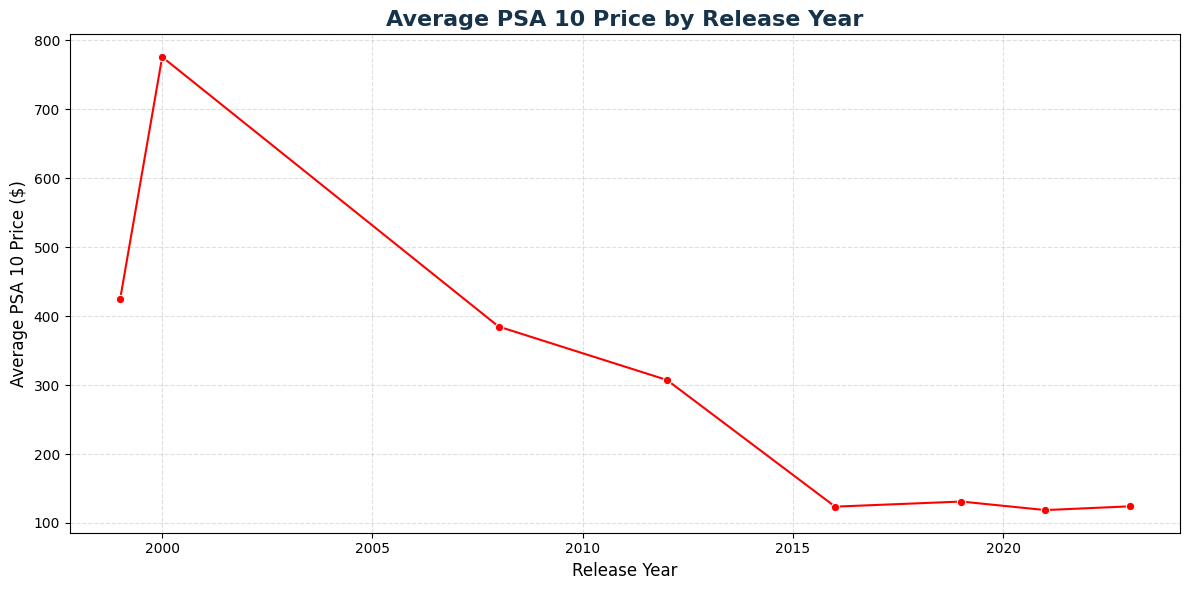

In [ ]:
# Group by year and calculate mean PSA 10 price
yearly_prices = df_prices.groupby('release_year')['psa_10'].mean().dropna()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_prices.index, y=yearly_prices.values, color="RED", marker='o')

plt.title('Average PSA 10 Price by Release Year', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average PSA 10 Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### EDA 3.2.4 - Top 15 PSA 10 Cards + ROI

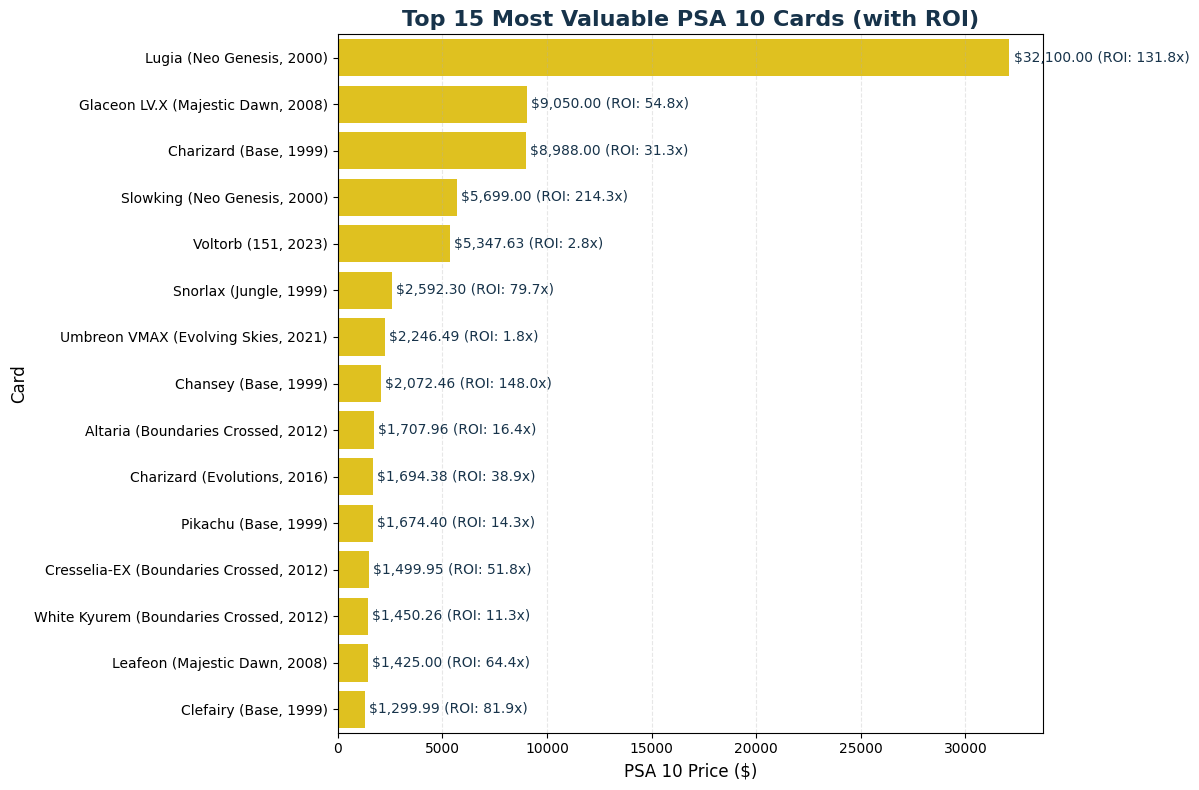

In [ ]:
# Card label with set + year
df_prices['card_label'] = (
    df_prices['name'] + ' (' + df_prices['set'] + ', ' + df_prices['release_year'].astype(str) + ')'
)

# Calculate ROI
df_prices['psa10_roi'] = df_prices.apply(
    lambda row: row['psa_10'] / row['loose'] if row['loose'] > 0 else None, axis=1
)

# Top 15 PSA 10 cards with ROI
top15 = (
    df_prices[['card_label', 'psa_10', 'psa10_roi']]
    .dropna()
    .drop_duplicates(subset='card_label')
    .sort_values(by='psa_10', ascending=False)
    .head(15)
    .reset_index(drop=True)
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=top15['card_label'], x=top15['psa_10'], color="gold")

# Title and labels
plt.title('Top 15 Most Valuable PSA 10 Cards (with ROI)', fontsize=16, color=title_color, weight='bold')
plt.xlabel('PSA 10 Price ($)', fontsize=12)
plt.ylabel('Card', fontsize=12)

# Value label + ROI
for i, row in top15.iterrows():
    label = f"${row['psa_10']:,.2f} (ROI: {row['psa10_roi']:.1f}x)"
    plt.text(row['psa_10'] + 200, i, label, va='center', fontsize=10, color=title_color)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### EDA 3.2.5 - Top 15 Ungraded Cards + ROI

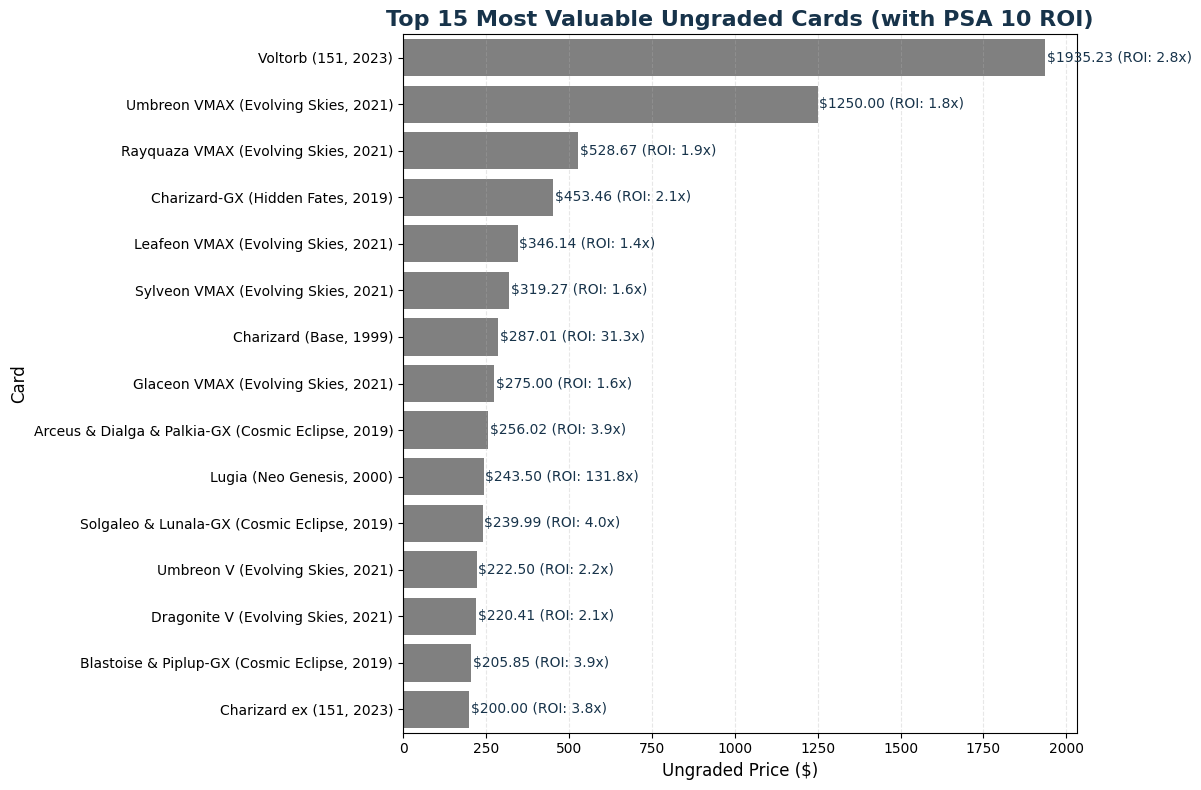

In [ ]:
# Label
df_prices['card_label'] = (
    df_prices['name'] + ' (' + df_prices['set'] + ', ' + df_prices['release_year'].astype(str) + ')'
)

# ROI and skip cards with loose = 0 to avoid div by zero
df_prices['psa10_roi'] = df_prices.apply(
    lambda row: row['psa_10'] / row['loose'] if row['loose'] > 0 else None, axis=1
)

# Clean and select top 15
top15_loose = (
    df_prices[['card_label', 'loose', 'psa_10', 'psa10_roi']]
    .dropna(subset=['loose', 'psa_10'])
    .drop_duplicates(subset='card_label')
    .sort_values(by='loose', ascending=False)
    .head(15)
    .reset_index(drop=True)
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=top15_loose['card_label'], x=top15_loose['loose'], color="Grey")

plt.title('Top 15 Most Valuable Ungraded Cards (with PSA 10 ROI)', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Ungraded Price ($)', fontsize=12)
plt.ylabel('Card', fontsize=12)

# Price + ROI label at end
for i, row in top15_loose.iterrows():
    label = f"${row['loose']:.2f} (ROI: {row['psa10_roi']:.1f}x)"
    plt.text(row['loose'] + 5, i, label, va='center', fontsize=10, color=title_color)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### EDA 3.2.6 - Generation Analysis of Most Valuable Cards

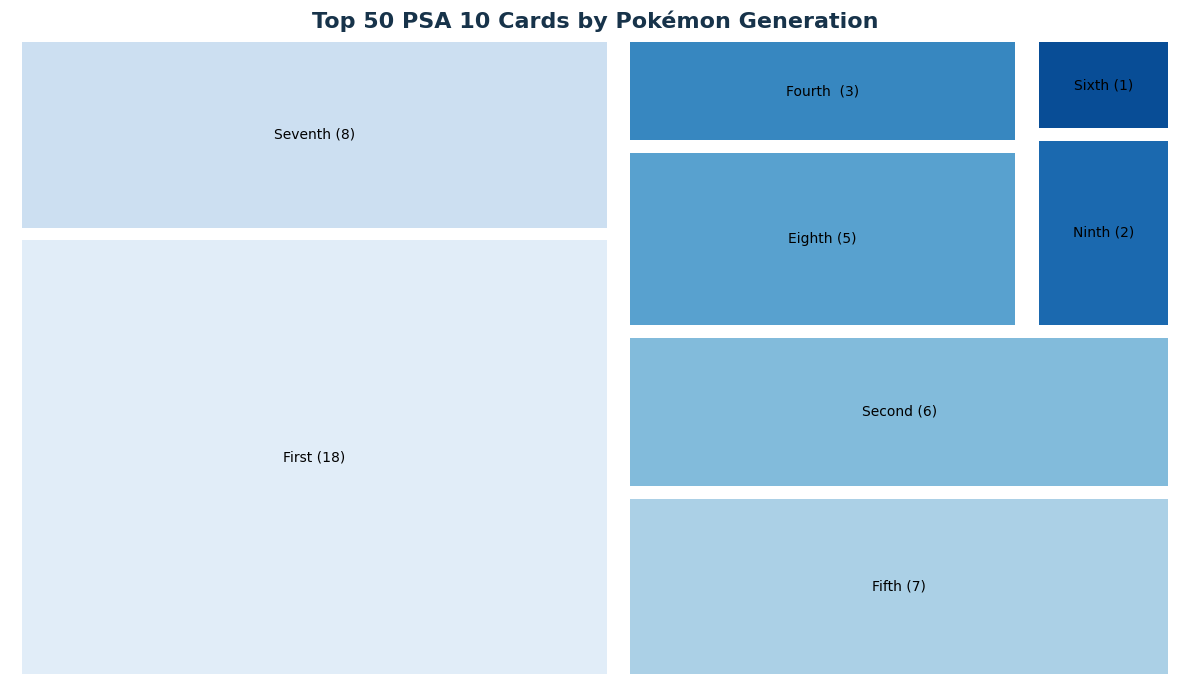

In [ ]:
!pip install squarify
import squarify  # for treemaps

# Filter top 50 by PSA 10 value
top50_gen = (
    df_prices[['generation', 'psa_10']]
    .dropna()
    .sort_values(by='psa_10', ascending=False)
    .head(50)
)

# Count how many top cards belong to each generation
gen_counts = top50_gen['generation'].value_counts().sort_values(ascending=False)

# Preparation and Labels
sizes = gen_counts.values
labels = [f"{gen} ({count})" for gen, count in zip(gen_counts.index, gen_counts.values)]

# Treemap
plt.figure(figsize=(12, 7))
squarify.plot(sizes=sizes, label=labels, color=sns.color_palette("Blues", len(sizes)), pad=True, text_kwargs={'fontsize': 10})
plt.title('Top 50 PSA 10 Cards by Pokémon Generation', fontsize=16, color=title_color, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### EDA 3.2.7 - Which Sets Offer the Best ROI?

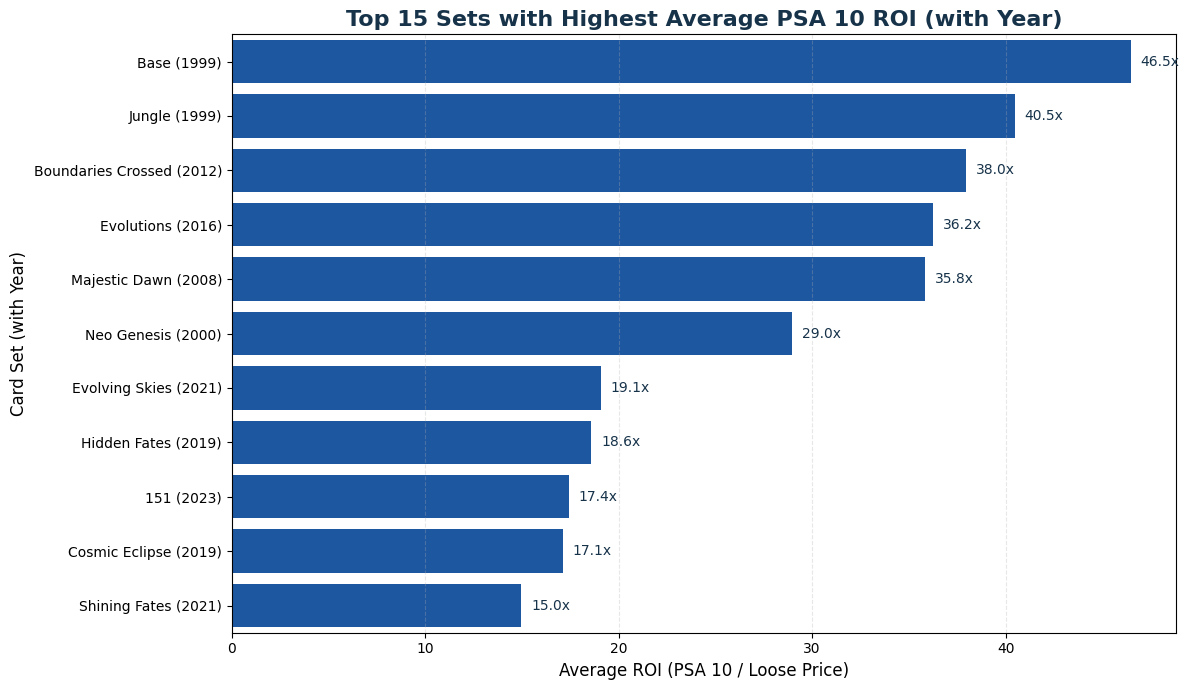

In [ ]:
# Get set + year label
set_year_roi = (
    df_prices[df_prices['psa10_roi'].notna()]
    .groupby(['set', 'release_year'])
    .agg(avg_roi=('psa10_roi', 'mean'), card_count=('name', 'count'))
    .sort_values(by='avg_roi', ascending=False)
    .reset_index()
)

# Filter to sets with at least 5 cards
set_year_roi = set_year_roi[set_year_roi['card_count'] >= 5]

# Label with year
set_year_roi['set_label'] = set_year_roi['set'] + ' (' + set_year_roi['release_year'].astype(str) + ')'

# Top 15 by ROI
top_sets = set_year_roi.head(15)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(data=top_sets, y='set_label', x='avg_roi', color='#0754b6')

# Title and labels
plt.title('Top 15 Sets with Highest Average PSA 10 ROI (with Year)', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Average ROI (PSA 10 / Loose Price)', fontsize=12)
plt.ylabel('Card Set (with Year)', fontsize=12)

# ROI text on bars
for i, row in top_sets.iterrows():
    plt.text(row['avg_roi'] + 0.5, i, f"{row['avg_roi']:.1f}x", va='center', fontsize=10, color=title_color)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### EDA 3.2.8 - PSA 10 Price Distribution by Release Year

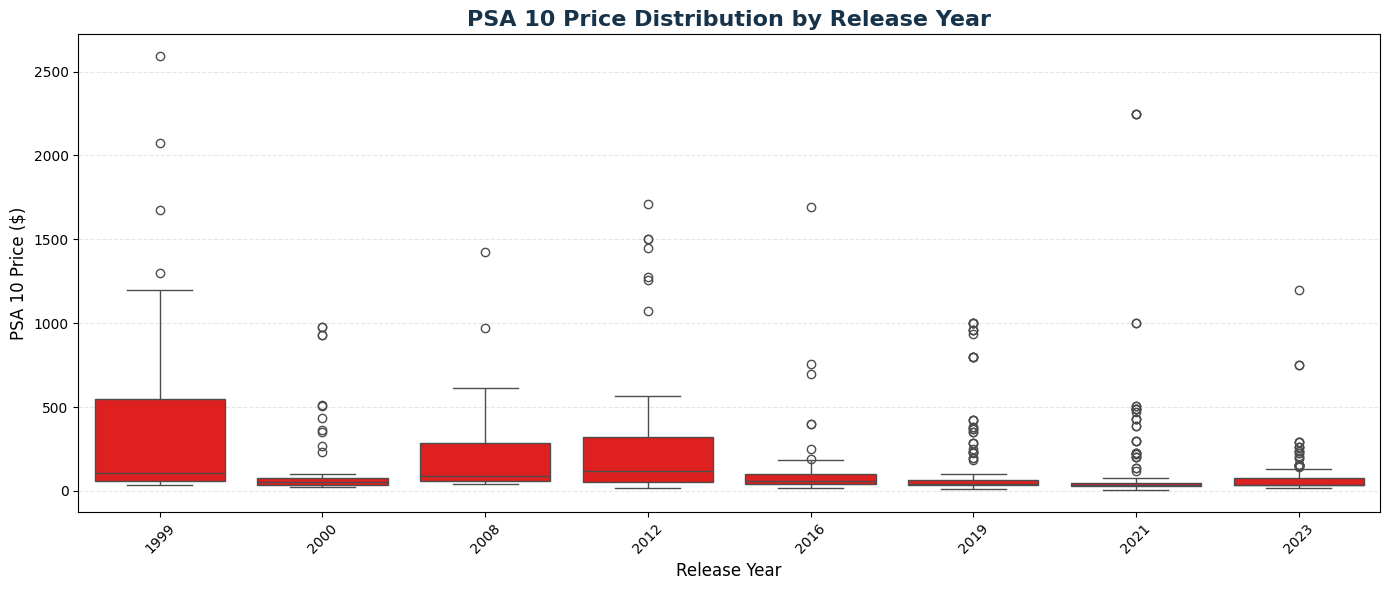

In [ ]:
# Filter out extreme values
filtered = df_prices[df_prices['psa_10'] < 5000]

# Box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered, x='release_year', y='psa_10', color='red')

# Labels
plt.title('PSA 10 Price Distribution by Release Year', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('PSA 10 Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### EDA 3.2.9 - Most Common Pokémon in High-Value Cards

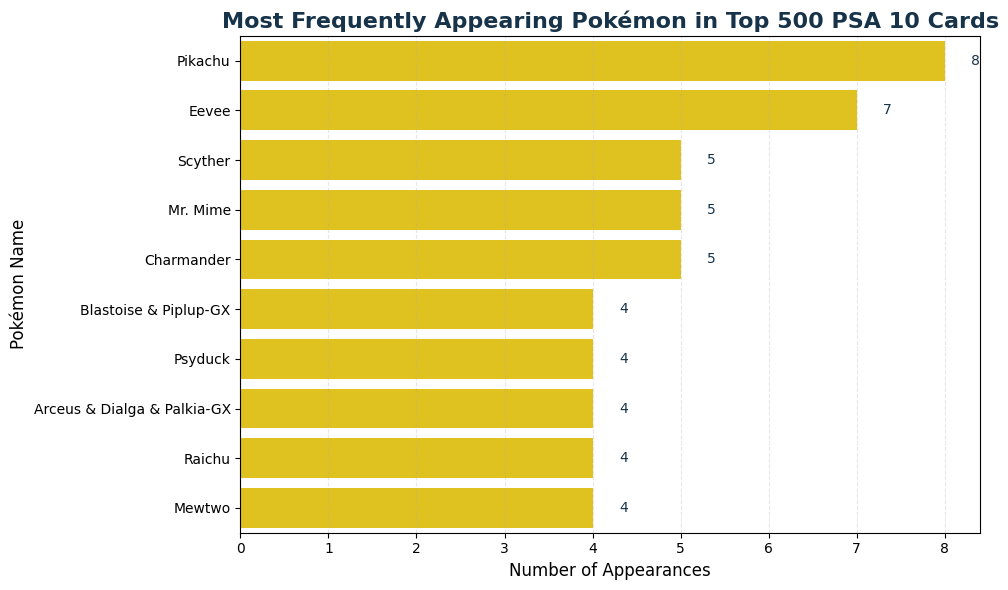

In [ ]:
# Top 500 most valuable PSA 10 cards
top_500 = df_prices[df_prices['psa_10'].notna()].nlargest(500, 'psa_10')

# Count Pokémon name frequency
top_counts_500 = top_500['name'].value_counts().head(10).reset_index()
top_counts_500.columns = ['name', 'count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_counts_500, y='name', x='count', color='gold')

# Titles and labels
plt.title('Most Frequently Appearing Pokémon in Top 500 PSA 10 Cards', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Number of Appearances', fontsize=12)
plt.ylabel('Pokémon Name', fontsize=12)

# Count labels on bars
for i, row in top_counts_500.iterrows():
    plt.text(row['count'] + 0.3, i, str(row['count']), va='center', fontsize=10, color=title_color)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# IV. Predictive Modeling & Feature Importance

## 4.1 Feature Engineering and Encoding

In [ ]:
# Copy of the dataset to avoid modifying original
model_df = df_prices.copy()

# Taking the first value in each list
model_df['types'] = model_df['types'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')
model_df['subtypes'] = model_df['subtypes'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'None')

# Drop rows with missing target
model_df = model_df[model_df['psa_10'].notna()]

# Define features and target
selected_features = [
    'rarity',
    'generation',
    'release_year',
    'types',
    'supertype',
    'subtypes',
    'hp',
    'convertedRetreatCost',
    'set'
]

target = 'psa_10'

# One-hot encode categorical variables
model_df_encoded = pd.get_dummies(model_df[selected_features], drop_first=True)

# Final dataset for modeling
X = model_df_encoded
y = model_df[target]

# Result
print("Feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)

Feature matrix shape: (853, 48)
Target variable shape: (853,)


## 4.2 Model Training and Evaluation

### Train-Test Split

In [ ]:
# Drop rows where features are missing
model_df_final = model_df_encoded.copy()
model_df_final['psa_10'] = y  # temporarily add target column so we can drop rows with missing values in any column
model_df_final = model_df_final.dropna() # Remove rows with missing values

# Separate features and target again
X = model_df_final.drop(columns='psa_10')
y = model_df_final['psa_10']

In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (624, 48)
Testing shape: (156, 48)


### Baseline Model: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Results
print("Linear Regression Performance:")
print(f"MAE (Mean Absolute Error): ${mae:.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:.2f}")
print(f"R2 Score: {r2:.3f}")

Linear Regression Performance:
MAE (Mean Absolute Error): $395.04
RMSE (Root Mean Squared Error): $870.80
R² Score: -4.212


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)

In [ ]:
# Evaluation
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Results
print("Random Forest Regressor Performance:")
print(f"MAE: ${rf_mae:.2f}")
print(f"RMSE: ${rf_rmse:.2f}")
print(f"R2 Score: {rf_r2:.3f}")

Random Forest Regressor Performance:
MAE: $202.01
RMSE: $676.77
R² Score: -2.148


<ipython-input-90-d756a807cdd7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, y='feature', x='importance', palette='Blues_r')


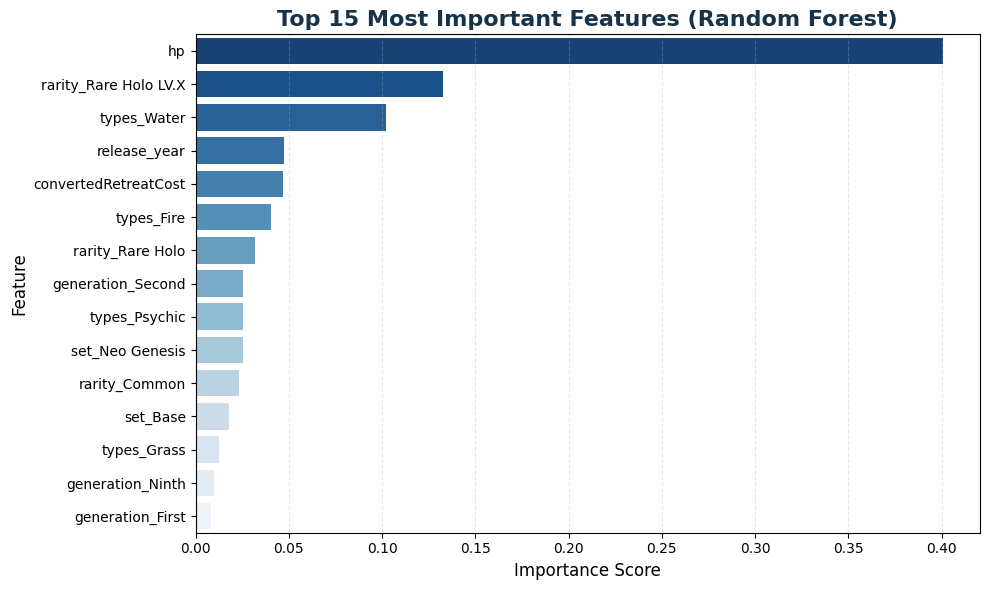

In [ ]:
# Feature Importance

import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame of features + importance
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importances, y='feature', x='importance', palette='Blues_r')

# Labels
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=16, color=title_color, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

### XGBoost Regressor

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor

# Train the model
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predict
xgb_pred = xgb.predict(X_test)

In [ ]:
# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

# Results
print("XGBoost Regressor Performance:")
print(f"MAE: ${xgb_mae:.2f}")
print(f"RMSE: ${xgb_rmse:.2f}")
print(f"R2 Score: {xgb_r2:.3f}")

XGBoost Regressor Performance:
MAE: $217.79
RMSE: $857.40
R² Score: -4.053


### LightGBM Regressor


In [ ]:
from lightgbm import LGBMRegressor

# Train the model
lgbm = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
lgbm.fit(X_train, y_train)

# Predict
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 624, number of used features: 34
[LightGBM] [Info] Start training from score 263.922772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
# Evaluate
print("LightGBM Regressor Performance:")
print(f"MAE: ${mean_absolute_error(y_test, lgbm_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, lgbm_pred)):.2f}")
print(f"R2 Score: {r2_score(y_test, lgbm_pred):.3f}")

LightGBM Regressor Performance:
MAE: $244.31
RMSE: $513.64
R² Score: -0.813


### CatBoost Regressor

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

# Train the model
cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(X_train, y_train)

# Predict
cat_pred = cat.predict(X_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00
🐱 CatBoost Regressor Performance:
MAE: $210.55
RMSE: $658.93
R² Score: -1.984


In [ ]:
# Evaluate
print("CatBoost Regressor Performance:")
print(f"MAE: ${mean_absolute_error(y_test, cat_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, cat_pred)):.2f}")
print(f"R2 Score: {r2_score(y_test, cat_pred):.3f}")

CatBoost Regressor Performance:
MAE: $210.55
RMSE: $658.93
R² Score: -1.984


### Log-Transformed Modeling for PSA 10 Price

In [ ]:
# Retrain Random Forest with Log-Transformed Target

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Log-transform the target (psa_10)
y_log = np.log1p(y)

# Train-test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# Train Random Forest on log-transformed target
rf_log = RandomForestRegressor(n_estimators=300, random_state=42)
rf_log.fit(X_train_log, y_train_log)

# Predict on test set and reverse log scale
y_pred_log = rf_log.predict(X_test_log)
y_pred_rf = np.expm1(y_pred_log)        # predicted prices in real scale
y_test_rf = np.expm1(y_test_log)        # true prices in real scale

In [ ]:
# Evaluate
mae = mean_absolute_error(y_test_rf, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
r2 = r2_score(y_test_rf, y_pred_rf)

# Results
print("Random Forest (Log-Transformed Target) Performance:")
print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R2 Score: {r2:.3f}")

Random Forest (Log-Transformed Target) Performance:
MAE: $131.58
RMSE: $394.63
R² Score: -0.070


## 4.3 Model Comparison Summary

In [ ]:
# Summary df with all models and performance metrics
model_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "XGBoost",
        "LightGBM",
        "CatBoost",
        "Random Forest (Log-Transformed)"
    ],
    "MAE": [
        395.04,
        202.01,
        217.79,
        244.31,
        210.55,
        131.58
    ],
    "RMSE": [
        870.80,
        676.77,
        857.40,
        513.64,
        658.93,
        394.63
    ],
    "R² Score": [
        -4.212,
        -2.148,
        -4.053,
        -0.813,
        -1.984,
        -0.070
    ]
})

# Display
model_comparison.style.format({"MAE": "${:.2f}", "RMSE": "${:.2f}", "R² Score": "{:.3f}"})

,Model,MAE,RMSE,R² Score
0,Linear Regression,$395.04,$870.80,-4.212
1,Random Forest,$202.01,$676.77,-2.148
2,XGBoost,$217.79,$857.40,-4.053
3,LightGBM,$244.31,$513.64,-0.813
4,CatBoost,$210.55,$658.93,-1.984
5,Random Forest (Log-Transformed),$131.58,$394.63,-0.070


# V. Model Interpretation Using SHAP

## 5.1 SHAP Explainer Setup

In [2]:
# 1st Step
# Ensure all features are numeric
X_numeric = X.copy()

# Convert categorical columns to numeric using one-hot encoding (drop_first avoids duplicate info!!)
X_numeric = pd.get_dummies(X_numeric, drop_first=True)

# 2nd Step
# Recreate log-transformed target
y_log = np.log1p(y)

# 3rd Step
# Split the data again
from sklearn.model_selection import train_test_split

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_numeric, y_log, test_size=0.2, random_state=42
)

# 4th Step
# Retrain RF
from sklearn.ensemble import RandomForestRegressor

rf_log = RandomForestRegressor(n_estimators=300, random_state=42)
rf_log.fit(X_train_log, y_train_log)

# 5th Step
!pip install shap
import shap

# TreeExplainer for RF model to explain predictions
explainer = shap.TreeExplainer(rf_log)

# SHAP values on test data
shap_values = explainer.shap_values(X_test_log)

NameError: name 'X' is not defined

## 5.2 Global Feature Importance (SHAP Bar Plot)

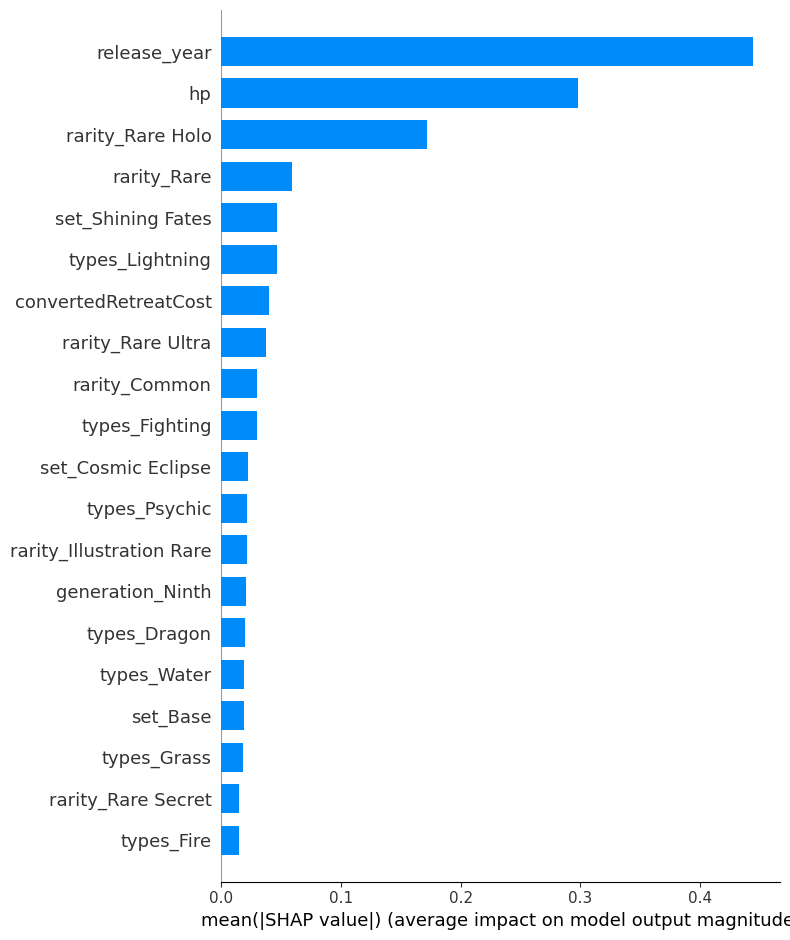

In [ ]:
import matplotlib.pyplot as plt

# Plot global feature importance
shap.summary_plot(shap_values, X_test_log, plot_type="bar", show=True)

## 5.3 SHAP Summary Plot

 94%|=================== | 147/156 [00:25<00:01]       

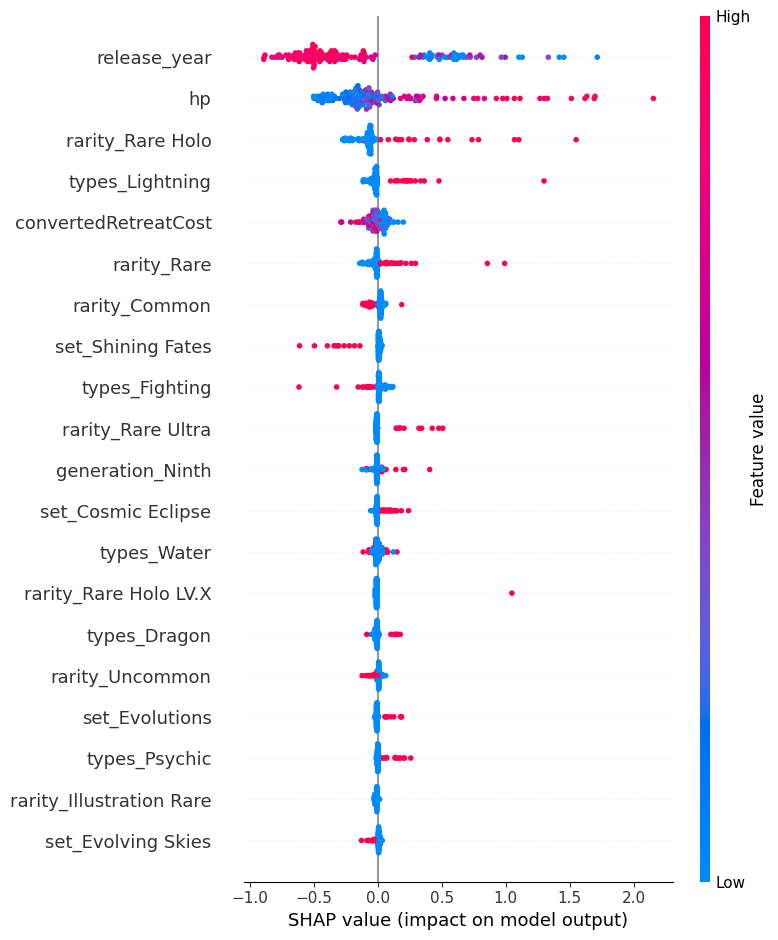

In [ ]:
import shap

# Convert to DataFrame and ensure all data is float64
X_train_shap = pd.DataFrame(X_train_log).astype(float)
X_test_shap = pd.DataFrame(X_test_log).astype(float)

# Sample 100 rows from training data for the SHAP explainer
X_shap_sample = X_train_shap.sample(100, random_state=42)

# SHAP Tree Explainer
explainer = shap.Explainer(rf_log, X_shap_sample)

# SHAP values on test data
shap_values = explainer(X_test_shap)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_shap, plot_type='dot', show=True)

## 5.4 Individual Prediction – SHAP Waterfall (Charizard)

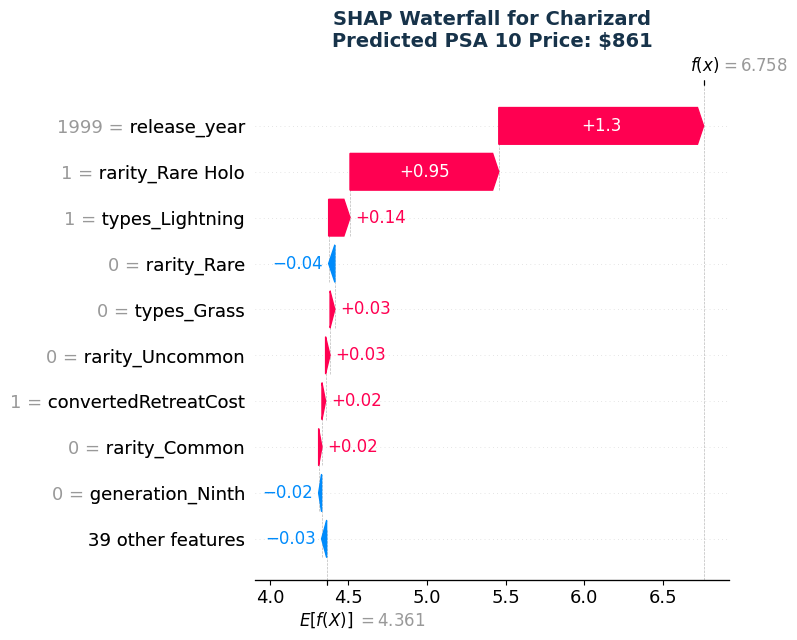

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# 1st Step
# Find most expensive Charizard in the full dataset
charizard_row = df_prices[df_prices['name'].str.contains('charizard', case=False)].sort_values(by='psa_10', ascending=False).iloc[0]
charizard_index = charizard_row.name  # original index

# 2nd Step
# Prepare features for that card
charizard_features = X.iloc[[charizard_index]] # select row for the target card
charizard_features_encoded = pd.get_dummies(charizard_features) # one-hot encode
charizard_features_encoded = charizard_features_encoded.reindex(columns=X_train_log.columns, fill_value=0).astype(float) # Match training feature # # Ensure numeric dtype

# 3rd Step
# SHAP Explainer
explainer = shap.TreeExplainer(rf_log)
charizard_shap = explainer.shap_values(charizard_features_encoded)

# 4th Step
# Predict log price and convert it to dollars
log_prediction = rf_log.predict(charizard_features_encoded)[0]  # Predict log-transformed price
dollar_prediction = np.exp(log_prediction) # Convert back price in dollars

# 5th Step
# Waterfall Plot with title
shap.plots.waterfall(
    shap.Explanation(
        values=charizard_shap[0],  # SHAP values for the selected card
        base_values=explainer.expected_value, # baseline prediction
        data=charizard_features_encoded.values[0], # feature values for selected card
        feature_names=charizard_features_encoded.columns.tolist()
    ),
    show=False  # prevent auto display
)

# 6th Step
# Title with predicted value in $
plt.title(f"SHAP Waterfall for Charizard\nPredicted PSA 10 Price: ${dollar_prediction:,.0f}", fontsize=14, color='#17334A', weight='bold')
plt.tight_layout()
plt.show()

# VI. Applying the Model for Real-World Price Prediction

## 6.1 Investor Use Case

Predicted PSA 10 Price: $317.74


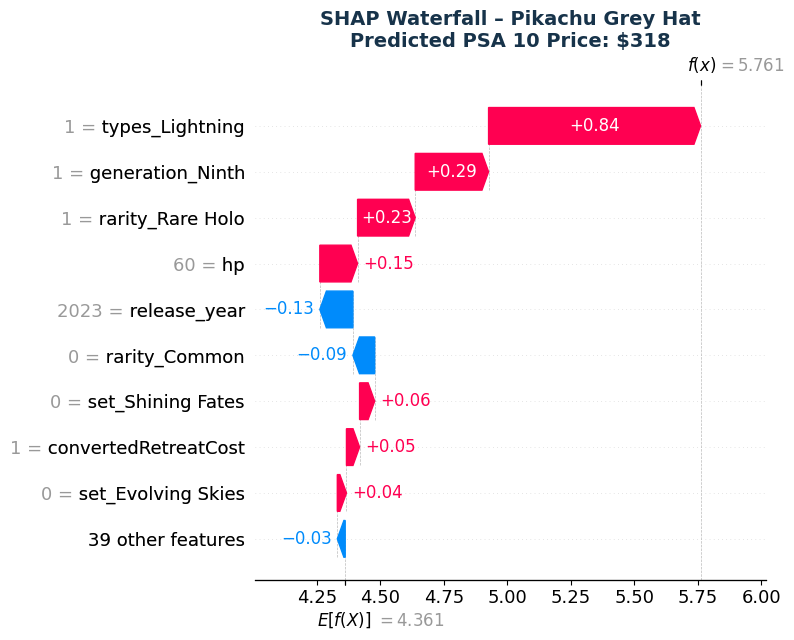

In [ ]:
# 1st Step
# Card details
new_card = pd.DataFrame([{
    'set': 'Promo',
    'series': 'Scarlet & Violet',
    'generation': 'Ninth',
    'release_year': 2023,
    'release_date': pd.to_datetime('2023-10-16'),
    'artist': 'AKIRA EGAWA',
    'name': 'Pikachu with Grey Felt Hat',
    'types': 'Lightning',  # string
    'supertype': 'Pokémon',
    'subtypes': 'Basic',  # string
    'hp': 60,
    'weaknesses': 'Fighting',
    'convertedRetreatCost': 1.0,
    'rarity': 'Rare Holo'
}])

# 2nd Step
# Encode features to match training input
new_card_encoded = pd.get_dummies(new_card)

# 3rd Step
# Align with training data columns
new_card_encoded = new_card_encoded.reindex(columns=X_train_log.columns, fill_value=0).astype(float)

# 4th Step
# Predict PSA 10 log-price and convert to $
log_prediction = rf_log.predict(new_card_encoded)[0]
predicted_price = np.exp(log_prediction)
print(f"Predicted PSA 10 Price: ${predicted_price:.2f}")

# 5th Step
# SHAP explanation
explainer = shap.TreeExplainer(rf_log)
shap_values = explainer.shap_values(new_card_encoded)

# 6th Step
# Waterfall plot with title
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0], #  SHAP values for new card
        base_values=explainer.expected_value, # # Baseline log price
        data=new_card_encoded.values[0], # # Encoded feature values for the card
        feature_names=new_card_encoded.columns.tolist()
    ),
    show=False # prevent auto display
)

plt.title(f"SHAP Waterfall – Pikachu Grey Hat\nPredicted PSA 10 Price: ${predicted_price:,.0f}",
          fontsize=14, color='#17334A', weight='bold')
plt.tight_layout()
plt.show()